In [363]:
# Basic information

import copy

HEIGHT, WIDTH = 512, 512
FPS = 30
RADIUS = 15
SPACE = 450
MILLIMETERS_IN_PIXEL = 2 * RADIUS / SPACE
FILE = 'tables/13.csv'
DELTA = 5

In [364]:
# Processing

import pandas as pd
data = pd.read_csv(FILE)
data.head(10)
data.drop('scorer', axis=1, inplace=True)
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True, drop=True)

columns_total = copy.deepcopy(len(data.columns))
for i in range(0, columns_total, 3):
    data.drop(data.columns[columns_total - i - 1], axis = 1, inplace = True)
    i -= 1

new_columns = []
for i in range(0, len(data.columns) // 2):
    new_columns.append(str(i + 1) + 'x')
    new_columns.append(str(i + 1) + 'y')

data.set_axis(new_columns, axis='columns', inplace = True)
data = data.apply(pd.to_numeric)
data *= MILLIMETERS_IN_PIXEL

data.head(10).round(4)

,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,...,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y
0,18.8517,11.9098,11.8312,19.8154,7.4195,17.1029,23.4479,11.8388,6.6182,24.9148,...,15.1990,18.0009,10.6102,4.4467,16.5454,7.9146,14.9635,14.0816,5.0970,21.6131
1,18.8649,11.8389,11.9734,19.8186,7.3817,17.0531,23.0566,11.9442,6.3937,25.1659,...,15.1772,18.0280,10.3089,4.6555,16.4728,7.8946,14.6817,14.0301,5.1055,21.5945
2,18.9290,11.6684,12.0406,19.7103,7.4889,17.0142,23.2457,11.8444,6.1808,25.4958,...,15.0705,18.0705,10.3001,4.6954,16.5372,7.8848,14.5188,13.6372,5.1090,21.5056
3,18.9896,11.8018,11.9990,19.7118,7.6798,17.1151,23.1527,11.9224,6.2724,25.3474,...,15.0345,18.0752,10.2862,4.6208,16.4992,7.8736,14.5106,13.5860,5.1017,21.5133
4,18.9877,11.6958,12.0283,19.7767,7.8100,17.2215,23.2757,11.8550,6.2266,25.2550,...,15.0567,18.0741,10.2626,4.6651,16.4158,7.8677,14.4156,13.4569,5.0801,21.4430
5,18.8557,11.6955,12.0818,19.7944,7.9557,17.2641,23.4458,11.9226,5.9497,25.3115,...,14.9952,18.0452,10.2196,4.6395,16.3454,7.8617,14.3161,13.3658,5.0568,21.3575
6,18.8505,11.6595,12.1908,19.7465,8.0381,17.3958,23.4134,12.0438,5.9479,25.3665,...,15.0270,18.0155,10.2621,4.6513,16.3620,7.8857,14.2221,13.1095,5.0329,21.2930
7,18.7417,11.3252,12.1589,19.6840,8.1724,17.3261,23.4702,12.1086,5.9800,25.3436,...,14.9991,18.0551,10.3261,4.6085,16.2917,7.8733,14.2614,12.8751,4.9438,21.3377
8,18.9641,11.6026,12.2234,19.5362,8.5254,17.1538,23.5938,12.0722,5.9032,25.4561,...,15.0105,18.0885,10.3450,4.6277,16.2968,7.9532,14.2262,12.6765,4.8853,21.2206
9,18.9067,11.3885,12.2407,19.6812,8.4581,17.2976,23.7279,12.0895,5.8967,25.4196,...,15.0610,18.0966,10.2847,4.6834,16.2569,7.9215,14.0854,12.2875,4.8131,21.2075


In [365]:
def normalize(data, number):
    for i in range(1, len(data.values)):
        dx = data.values[i][number * 2] - data.values[i - 1][number * 2]
        dy = data.values[i][number * 2 + 1] - data.values[i - 1][number * 2 + 1]
        if dx * dx + dy * dy > DELTA:
            data.values[i][number * 2] = data.values[i - 1][number * 2]
            data.values[i][number * 2 + 1] = data.values[i - 1][number * 2 + 1]

In [366]:
for number in range(0, len(data.columns) // 2):
    normalize(data, number)

In [367]:
# Ploting trajectories

import matplotlib.pyplot as plt

def plot_trajectories(data, numbers):
    cycol = cycle('bgrcmk')
    ax = data.plot(x = str(numbers[0] + 1) + 'x', y = str(numbers[0] + 1) + 'y', style='b', legend = False, figsize = [10, 10 * HEIGHT / WIDTH])
    for i in range(1, len(numbers)):
        data.plot(x = str(numbers[i] + 1) + 'x', y = str(numbers[i] + 1) + 'y', ax = ax, legend = False)
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle=':', linewidth='0.5')
    ax.set_ylim(0, HEIGHT * MILLIMETERS_IN_PIXEL)
    ax.set_xlim(0, WIDTH * MILLIMETERS_IN_PIXEL)
    plt.title('Trajectories for ' + str(RADIUS * 2) + 'cm circle')
    plt.show()

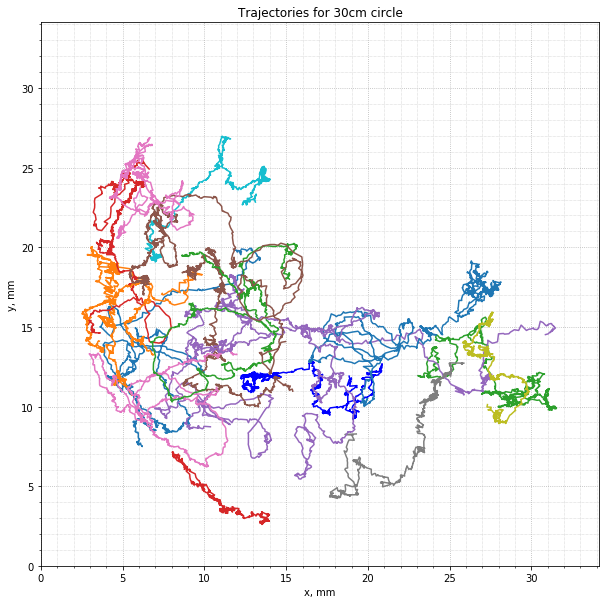

In [368]:
plot_trajectories(data, [i for i in range(0, len(data.columns) // 2)])

In [369]:
# Path ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def path(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        current = [0]
        for i in range(1, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[i - 1][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[i - 1][element * 2 + 1]
            value = current[-1] + np.sqrt(dxcur * dxcur + dycur * dycur)
            current.append(value)
        plt.plot(time_value, current, ':', c = 'steelblue')
        result.append(current)
        
    average_path = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_path.append(total)
    plt.plot(time_value, average_path, c = 'red')
    plt.plot(time_value, [RADIUS * 10] * len(time_value), c = 'black')
    ax.set_xlabel('t, s')
    ax.set_ylabel('length, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth = '0.5')
    plt.title('Path length for ' + str(RADIUS * 2) + 'cm circle')

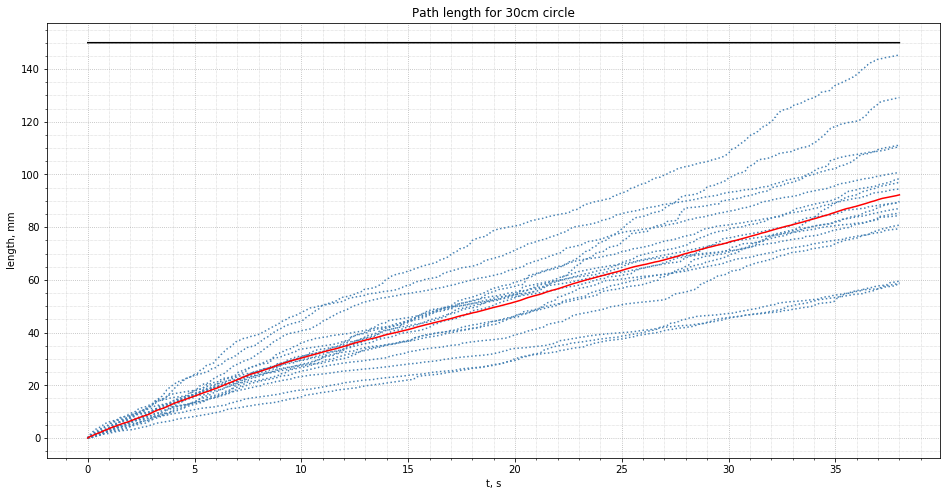

In [370]:
path(data, [i for i in range(0, len(data.columns) // 2)])

In [371]:
# Distance ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_distance(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        dist = []
        for i in range(0, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[0][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[0][element * 2 + 1]
            dist.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data))]
        plt.plot(time_value, dist, ':', c = 'steelblue')
        result.append(dist)
        
    average_dist = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_dist.append(total)
    plt.plot(time_value, average_dist, c = 'red')
    plt.plot(time_value, [RADIUS] * len(time_value), c = 'black')
    
    ax.set_xlabel('t, s')
    ax.set_ylabel('distance, сm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth='0.5')
    plt.title('Distance for ' + str(RADIUS * 2) + 'cm circle')

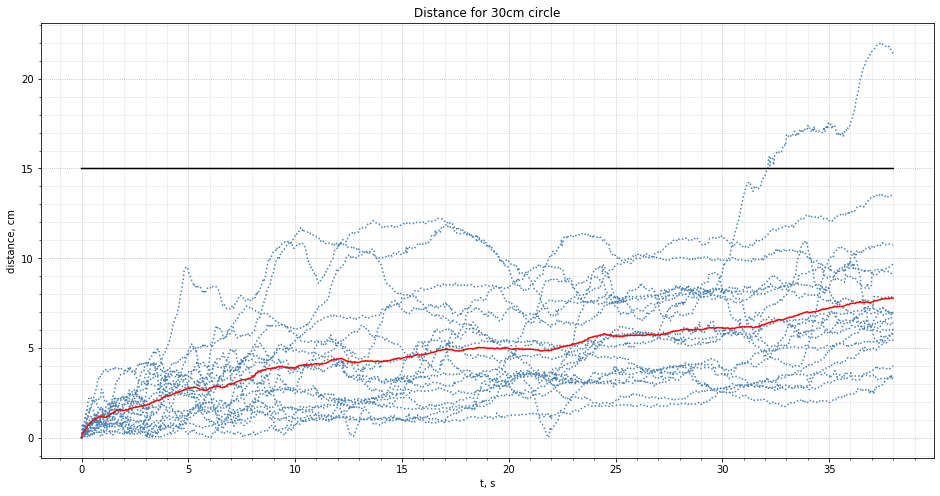

In [372]:
plot_distance(data, [i for i in range(0, len(data.columns) // 2)])

In [373]:
# Distance from center ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def center_distance(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        dist = []
        for i in range(0, len(data.values)):
            dxcur = data.values[i][element * 2] - MILLIMETERS_IN_PIXEL * WIDTH / 2
            dycur = data.values[i][element * 2 + 1] - MILLIMETERS_IN_PIXEL * HEIGHT / 2
            dist.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data))]
        plt.plot(time_value, dist, ':', c = 'steelblue')
        result.append(dist)
        
    average_dist = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_dist.append(total)
    plt.plot(time_value, average_dist, c = 'red')
    plt.plot(time_value, [RADIUS] * len(time_value), c = 'black')
    
    ax.set_xlabel('t, s')
    ax.set_ylabel('distance, сm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth='0.5')
    plt.title('Distance from center for ' + str(RADIUS * 2) + 'cm circle')

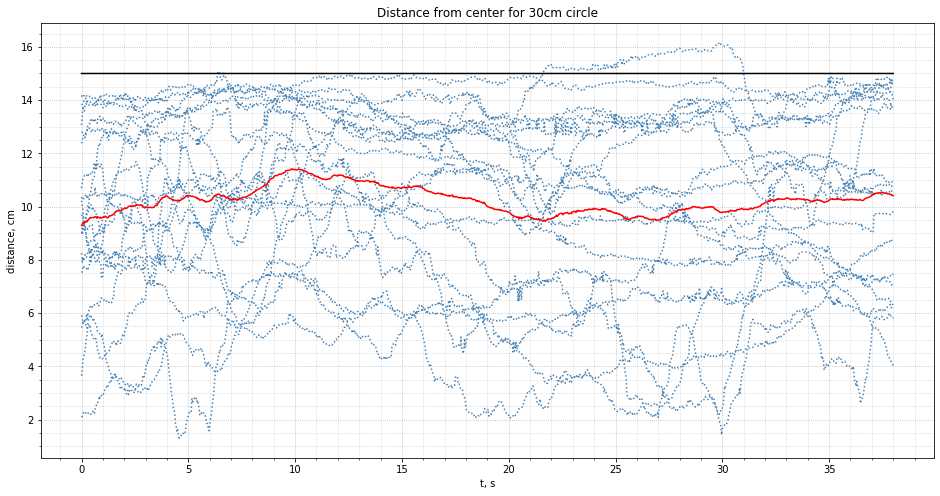

In [374]:
center_distance(data, [i for i in range(0, len(data.columns) // 2)])